In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm
%inline matplotlib 
sns.set_style('whitegrid')


UsageError: Line magic function `%inline` not found.


In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ['petal_length','petal_width','species']
df.loc [:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col = ['petal_length','petal_width']
X = df.loc[:, col]

In [7]:
species_to_num = {
    'setosa':0,
    'versicolor':1,
    'virginica': 2
}

df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [8]:
C = 1.0
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X, y)


SVC(kernel='linear')

In [9]:
clf.predict([[6,2]])

c:\users\patrick vintage\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [10]:
#Create a meshplot in 
Xv = X.values.reshape(-1,1)
h = 0.02
X_min, X_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx,yy = np.meshgrid(np.arange(X_min, X_max, h),
                np.arange(y_min, y_max, h))

c:\users\patrick vintage\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


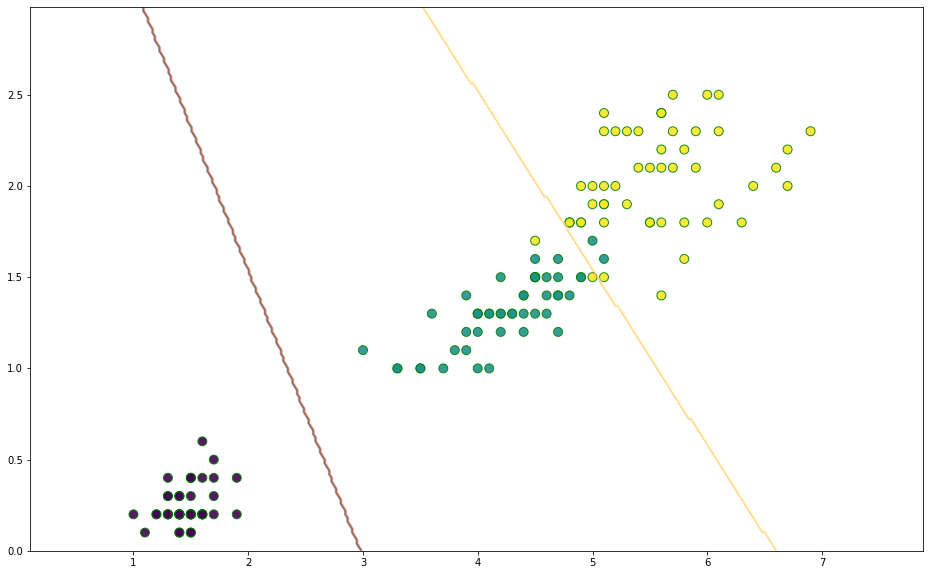

In [11]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contour(xx, yy, z, cmap = 'afmhot', alpha = 0.3);
plt.scatter(X.values[:,0], X.values[:, 1], c=y, s=80, alpha = 0.9, edgecolors = 'g');


c:\users\patrick vintage\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


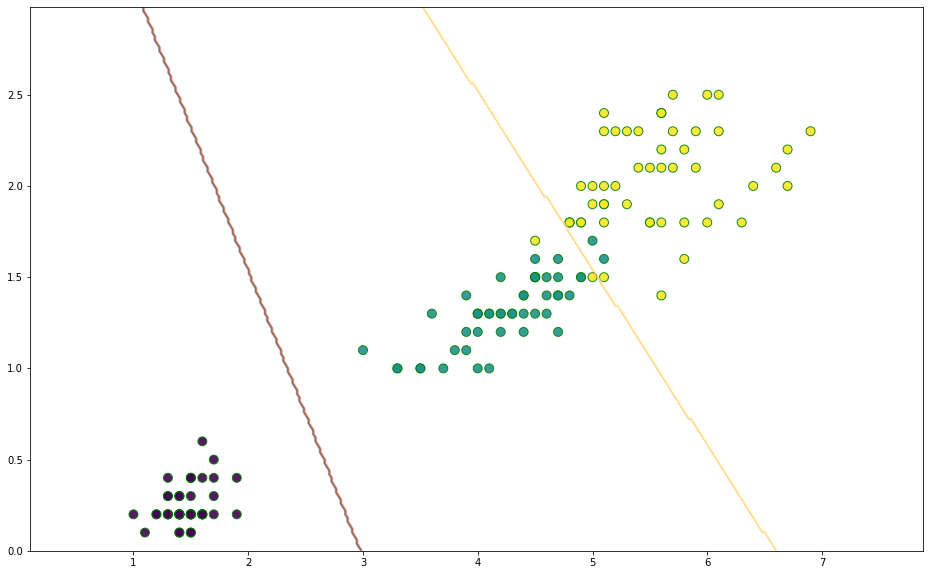

In [12]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contour(xx, yy, z, cmap = 'afmhot' , alpha = 0.3);
plt.scatter(X.values[:, 0],X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors = 'g')

***

# Linear SVM implementation

In [13]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length','petal_width']
X = df.loc[:, col]
species_to_num = {
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8, random_state = 0)

***

### Scale feature

In [14]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [15]:
C = 1.0
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score




### Cross Validation within Train Dataset

In [17]:
res = cross_val_score(clf, X_std_train, y_train, cv=9, scoring = 'accuracy')
print("Average Accuracy: \t {0: .4f}".format(np.mean(res)))
print("Average SD: \t {0: .4f}".format(np.std(res)))

Average Accuracy: 	  1.0000
Average SD: 	  0.0000


In [18]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

In [20]:
print("Precision score: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average='weighted')))
print("Recall_score: \t {0:.4f}".format(recall_score(y_train, y_train_pred, average = 'weighted')))
print("F1 score: \t {0:.4f}".format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision score: 	 0.9700
Recall_score: 	 0.9667
F1 score: 	 0.9668


***

### Cross Validation within Test Dataset

In [21]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[40,  0,  0],
       [ 0, 39,  0],
       [ 0,  4, 37]], dtype=int64)

In [23]:
print("Precision score \t {0:.4f}".format(precision_score(y_test,y_test_pred, average = 'weighted')))
print("Recall score \t {0:.4f}".format(recall_score(y_test, y_test_pred, average = 'weighted')))
print("F1 score \t {0:.4f}".format(f1_score(y_test, y_test_pred, average = 'weighted')))


Precision score 	 0.9698
Recall score 	 0.9667
F1 score 	 0.9666


***

<img src='img\polynomial.png'>

# Polynomial Kernel

In [24]:
c = 1.0
clf = svm.SVC (kernel = 'poly', degree = 3, C=c)
clf.fit(X, y)

SVC(kernel='poly')

In [25]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

c:\users\patrick vintage\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


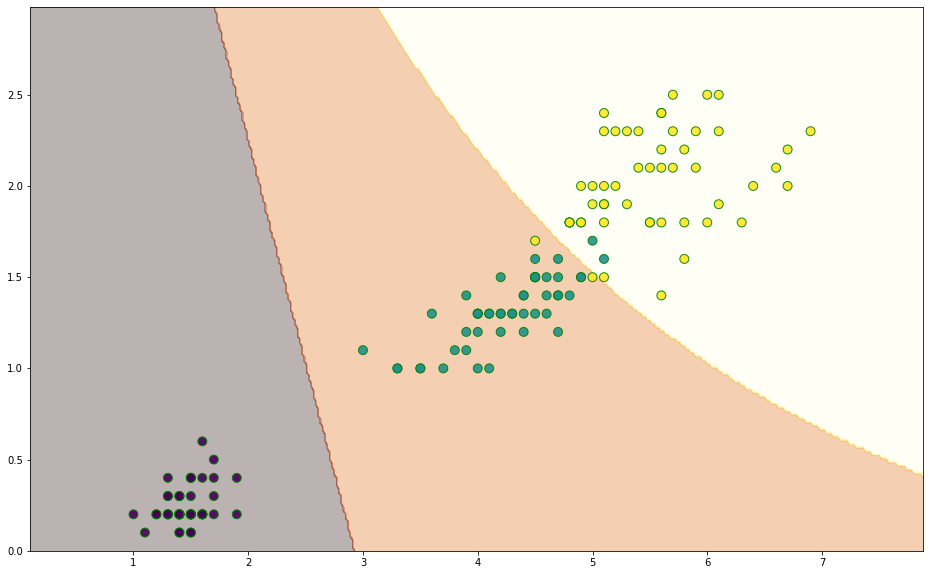

In [26]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

***

# Polynomial SVM Implementation 

In [27]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

***

#### Scale feature

In [28]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [29]:
C = 1.0
clf = svm.SVC(kernel = 'poly', degree = 10, C=C)
clf.fit(X_std_train, y_train)

SVC(degree=10, kernel='poly')

***

### Cross validation within train dataset

In [30]:
res = cross_val_score(clf, X_std_train, y_train, cv = 10 , scoring = 'accuracy')
print("Average Accuracy: \t {0: .4f}".format(np.mean(res)))
print("Average std: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	  0.7833
Average std: 		 0.1404


In [31]:
y_train_pred = cross_val_predict (clf, X_std_train, y_train, cv = 3)

In [32]:
confusion_matrix (y_train, y_train_pred)

array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 19, 18]], dtype=int64)

In [33]:
print("Precision score: \t{0:.4f}".format(precision_score(y_train, y_train_pred, average = 'weighted')))
print("Recall score: \t\t{0:.4f}".format(recall_score(y_train, y_train_pred, average = 'weighted')))
print('F1 score \t\t{0:.4f}'.format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision score: 	0.7746
Recall score: 		0.7500
F1 score 		0.7262


****

### cross validation with Test dataset

In [42]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv = 3)

ValueError: Found input variables with inconsistent numbers of samples: [120, 30]

In [41]:
confusion_matrix(y_test, y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [30, 120]

In [40]:
print("Precision score: \t{0:.4f}".format(precision_score(y_test, y_test_pred, average = 'weighted')))

print("Recall score: \t\t{0:.4f}".format(recall_score(y_test, y_test_pred, average = 'weighted')))

print('F1 score \t\t{0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))


ValueError: Found input variables with inconsistent numbers of samples: [30, 120]

***

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

UsageError: Line magic function `%` not found.


In [37]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()

c:\users\patrick vintage\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
X = df[['LSTAT']].values
y = boston_data.target

In [39]:
svr = SVR()
svr.fit(X, y)

NameError: name 'SVR' is not defined